## Practica 3: Circuitos neuronales
#### Miguel Angel Calderón
#### Alvaro Alvarez
#### Runtian Wang
#### Alba Martinez

### 1-Construir una neurona HH usando la implementación de la práctica 1, sustituyendo la entrada de corriente constante por una sinapsis con 3 picos entregados con 10 ms de separación.



Importamos librerias a utilizar:

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [3]:
L=50000

In [4]:
#Valores dinámicos
v=np.zeros(L)
m=np.zeros(L)
h=np.zeros(L)
n=np.zeros(L)

#Capacidad
c=1

#Potenciales de los diferentes canales
Vna=50
Vk=-77
Vl=-54.387

#Conductancia de los diferentes canales
gna=120
gk = 36
gl = 0.3

#Condiciones iniciales
v0 = -65
m0 = 0.053
h0 = 0.6
n0 = 0.318

#Sinapsis
r=np.zeros(L)
Isync=np.zeros(L)

alphaR=2
betaR=1
gsync=1
Esync=0
r0=0
I0=0
Tmax=1


In [5]:
def alphaM(x):
  return (0.1*(-x-40))/(np.exp((-x-40)/10)-1)
def betaM(x):
  return 4*np.exp((-x-65)/18)

def alphaH(x):
  return 0.07*np.exp((-x-65)/20)
def betaH(x):
  return 1/(np.exp((-x-35)/10)+1)

def alphaN(x):
  return (0.01*(-x-55))/(np.exp((-x-55)/10)-1)
def betaN(x):
  return 0.125*np.exp((-x-65)/80)

In [6]:
def T(t):
  if t>=0 and t<=1000:
    return Tmax
  elif t>=10000 and t<=11000:
    return Tmax
  elif t>=20000 and t<=21000:
    return Tmax
  else:
    return 0

In [7]:
def HH(x):
  for i in range(0,x):
    if i==0:
      v[i]=v0
      m[i]=m0
      h[i]=h0
      n[i]=n0
      r[i]=r0
      Isync[i]=I0

    else:
      v[i]=v[i-1] + (10**-3)*((Isync[i-1] -  gl*(v[i-1]-Vl) - gna*m[i-1]**3*h[i-1]*(v[i-1]-Vna) - gk*n[i-1]**4*(v[i-1]-Vk))/c)
      m[i]=m[i-1] + (10**-3)*(alphaM(v[i-1])*(1-m[i-1]) - betaM(v[i-1])*m[i-1])
      h[i]=h[i-1] + (10**-3)*(alphaH(v[i-1])*(1-h[i-1]) - betaH(v[i-1])*h[i-1])
      n[i]=n[i-1] + (10**-3)*(alphaN(v[i-1])*(1-n[i-1]) - betaN(v[i-1])*n[i-1])
      r[i]=r[i-1] + (10**-3)*(alphaR*T(i)*(1-r[i-1])-betaR*r[i-1])
      Isync[i]=gsync*r[i-1]*(v[i-1]-Esync)

In [8]:
HH(L)

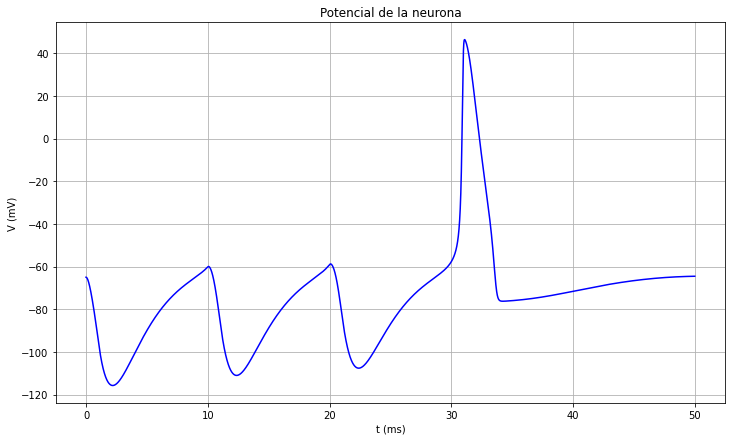

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,50,50000), v, label="Vsync",c="b")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

En el marco del modelo presentado, se conceptualiza la sinapsis como una conductancia que juega un papel crucial en la determinación de la corriente que atraviesa la neurona postsináptica. Esta corriente se calcula mediante una fórmula específica al final de cada ciclo en un bucle for, incorporando elementos como la conductancia sináptica, el potencial de membrana previamente registrado y el gradiente de potencial sináptico, reflejando la diferencia entre el potencial de la neurona presináptica y el potencial de reposo de la postsináptica. Dicha corriente es esencial para ajustar la actividad neuronal y facilitar la comunicación entre neuronas.


La conductancia sináptica, dentro de este contexto, actúa como un factor de ajuste en la ecuación que define la corriente, modulada por la actividad sináptica que es representada a través de la variable de compuerta "r". La evolución de "r" se describe por una ecuación diferencial que establece su dinámica en respuesta a los estímulos.

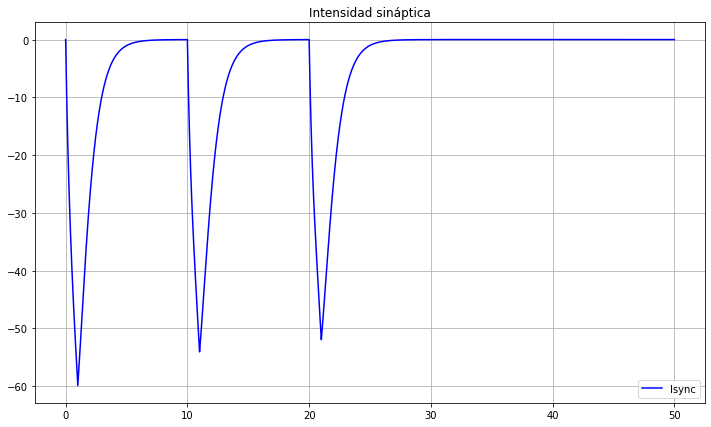

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,50,50000), Isync,label="Isync",c="blue")
ax.set_title('Intensidad sináptica')
ax.legend()
plt.grid()


Esencialmente, esta conductancia sináptica modula el flujo de corriente basándose en el nivel de activación sináptica. Con cada potencial de acción en la neurona presináptica, la variable "r" incrementa, llevando a un aumento correspondiente en la conductancia y, por ende, en la corriente que pasa a través de la neurona postsináptica. Este proceso afecta significativamente el potencial de membrana de la neurona, pudiendo inducir la generación de potenciales de acción si la corriente es suficiente para alcanzar el umbral de disparo. Tal mecanismo subraya la importancia de la plasticidad neuronal, la capacidad del sistema nervioso para adaptarse y modificar su funcionamiento en respuesta a nuevas experiencias o a la actividad neuronal misma.

Los efectos de este mecanismo se visualizan claramente en el análisis gráfico del potencial neuronal, donde se observan tres incrementos notables asociados a tres distintas entregas de corriente sináptica. Cada nuevo incremento se construye sobre el residual del anterior, dado que la neurona no logra repolarizarse completamente entre entregas. Este fenómeno acumulativo facilita que, al llegar el tercer pulso, el potencial neuronal supere el umbral necesario para desencadenar un potencial de acción.

De este modo, la interacción entre los pulsos de corriente sináptica y la capacidad de la neurona para repolarizarse entre estos pulsos revela una dinámica que permite la acumulación progresiva de potencial hasta alcanzar un punto crítico que precipita la generación de un potencial de acción, ilustrando la complejidad de las respuestas neuronales ante estímulos sinápticos.

### Parte 2. Construir un circuito usando el Modelo HR con los siguientes parametros:

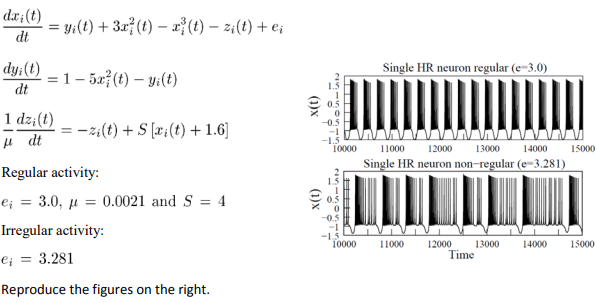

In [11]:
L=500000

In [12]:
x=np.zeros(L)
y=np.zeros(L)
z=np.zeros(L)

x_0=-1.5
y_0=0.3
z_0=3

mu = 0.0021
s = 4

a=3
b=1
c=1
d=5

In [13]:
def HR(e):
  for i in range(0,L):
    if i==0:
      x[i]=x_0
      y[i]=y_0
      z[i]=z_0
    else:
      x[i] = x[i-1] + (0.01)*(y[i-1] + a*x[i-1]*x[i-1] - b*x[i-1]*x[i-1]*x[i-1] - z[i-1] + e)
      y[i] = y[i-1] + (0.01)*(c - d*x[i-1]*x[i-1] - y[i-1])
      z[i] = z[i-1] + (0.01)*(mu *(s*(x[i-1] +1.6) - z[i-1]))

# **Actividad regular**


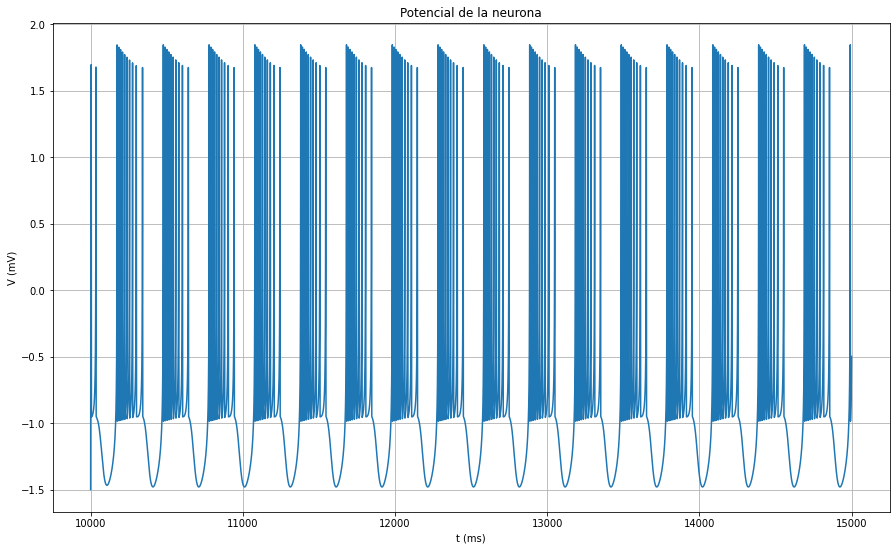

In [14]:
HR(3)
ig, ax = plt.subplots(figsize=(15, 9))
ax.plot(np.linspace(10000,15000,L), x)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

Esta representación muestra la actividad de una neurona modelada por el sistema de Hindmarsh-Rose en un régimen de comportamiento regular. La corriente de entrada establece una dinámica en la cual el potencial de membrana oscila de manera periódica y predecible, reflejando un patrón típico de disparo neuronal. Las oscilaciones regulares indican una respuesta constante a un estímulo sostenido, lo cual es característico de la función neuronal bajo condiciones normales y estables.

# **Actividad caótica**

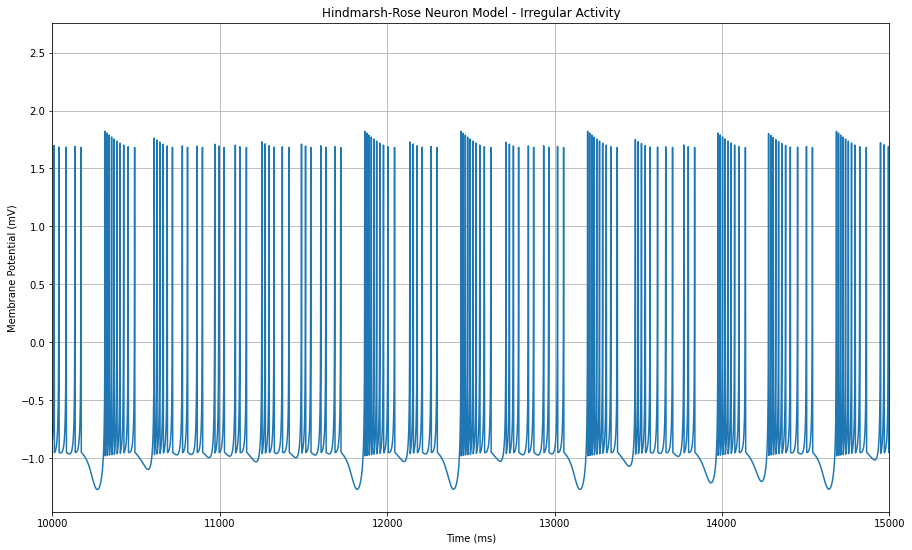

In [15]:
# Parámetros del modelo Hindmarsh-Rose
a = 1.0
b = 3.0
c = 1.0
d = 5.0
r = 0.0021
s = 4.1
x0 = -1.6
e = 3.285  # Corriente de entrada

# Condiciones iniciales
x_init = 0.1
y_init = 0.0
z_init = 0.0

# Parámetros de tiempo
dt = 0.01
t = np.arange(7900, 15000, dt)
L = len(t)  # Actualización del número de pasos de tiempo

# Inicialización de los arreglos para las variables de estado
x = np.zeros(L)
y = np.zeros(L)
z = np.zeros(L)

# Definición de la función de Hindmarsh-Rose
def HR(x, y, z, e, dt, L):
    for i in range(1, L):
        dx = y[i-1] - a * x[i-1]**3 + b * x[i-1]**2 - z[i-1] + e
        dy = c - d * x[i-1]**2 - y[i-1]
        dz = r * (s * (x[i-1] - x0) - z[i-1])
        x[i] = x[i-1] + dx * dt
        y[i] = y[i-1] + dy * dt
        z[i] = z[i-1] + dz * dt

# Aplicación de la función de Hindmarsh-Rose con los parámetros dados
x[0], y[0], z[0] = x_init, y_init, z_init  # Aplicación de condiciones iniciales
HR(x, y, z, e, dt, L)

# Creación de la gráfica
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(t, x)
plt.xlim([10000,15000])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane Potential (mV)')
ax.set_title('Hindmarsh-Rose Neuron Model - Irregular Activity')
plt.grid(True)
plt.show()


Esta gráfica captura la actividad de una neurona modelada por el sistema de Hindmarsh-Rose bajo condiciones caóticas. Se ha introducido una corriente ligeramente mayor, desviándola de la regularidad y llevándola a un comportamiento dinámico complejo y menos predecible. El patrón de disparo muestra una variabilidad que puede estar asociada con un procesamiento neuronal rico y flexible, pero también puede ser indicativo de un estado excitatorio o patológico, como se observa en ciertas condiciones neurológicas

### Red neuronal CPG (Control Pattern Global)

#### CPG reducido

En esta sección se creara una red neuronal CPG a partir del modelo neuronal de Hindmarsh–Rose realizado en el apartado anterior. Este CPG tratará de uno reducido, que nos ayudará a entender los principios fundamentales sobre la generación de patrones.

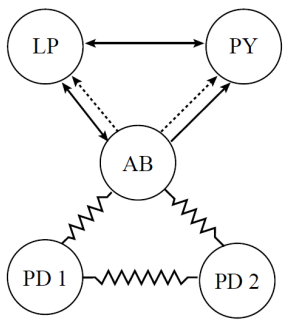

Se ha desarrollado un diccionario que contendrá información sobre las neuronas del modelo CPG. Cada neurona estará representada por una clave única, y su valor estará compuesto por tres arrays correspondientes a las variables x, y y z, que son los elementos 0, 1 y 2 respectivamente. Además, en el caso específico de las neuronas LP y PY, se incluirán tres elementos adicionales en el valor del diccionario, que corresponden a las variables m, $k_1\ y\ k_2$.
También se añadirán las conexiones entre neuronas en el diccionario. Luego a parte del diccionario se definen las diferentes constantes necesarias para la implementación del modelo.

In [26]:
L = 1000000
neuronas={
    "PD1":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "PD2":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "AB":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "LP":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),np.full(L,0.74),np.full(L,0.007))),
    "PY":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),np.full(L,0.74),np.full(L,0.15))),

    # Valores escalares k1 y k2 para LP y PY
    "LP_k1": 0.74,
    "LP_k2": 0.007,
    "PY_k1": 0.74,
    "PY_k2": 0.15,

    "PD2-PD1":0.332, #Dirección inversa con el mismo valor
    "AB-PD1":0.325,  #Dirección inversa con el mismo valor
    "AB-PD2":0.548,  #Dirección inversa con el mismo valor

    "gfAB-LP": 0.112,
    "gfAB-PY":0.120,
    "gfLP-AB":0.585,
    "gfLP-PY":0.241,
    "gfPY-LP":0.186,

    "glAB-LP":0.032,
    "glAB-PY":0.029
}
x=0
y=1
z=2
m=3
k1=4
k2=5

mu = 0.0021
s = 4

a=3
b=1
c=1
d=5

Constantes para calcular las sinapsis quimicas de las neuronas AB, LP y PY

In [17]:
e_syn=-1.92
v_fast=-1.66
s_fast=0.44
s_slow=1
v_slow=-1.74

Funciones que calculan:
- $difPot\ =\ \sum_{j\neq i}g_{ij}(x_i(t)-x_j(t))$

- $Ifast_X\ =\ \sum_i \frac{g_{fast\ YX}(V_X-E_{syn}}{1+exp(s_{fast}(V_{fast}-V_Y))}$

- $Islow_X\ =\ \sum_{Y}g_{slow\ YX}m_{slowX}(V_X-E_{syn})$

In [18]:
def difPoten(g,xi,xj):
  sum=0
  for i in range(0,len(xj)):
    sum+=g[i]*(xi-xj[i])
  return sum

def Ifast(g,xi,xj):
  sum=0
  for i in range(0,len(xj)):
    sum+=(g[i]*(xi-e_syn))/(1+np.exp(s_fast*(v_fast-xj[i])))
  return sum

def Islow(g,xi,m_slow):
  sum=0
  sum+=g*m_slow*(xi-e_syn)
  return sum

Implementación del CPG reducido con hindmarsh–rose

Valores iniciales de las neuronas:
- PD1: $x_0=-1.5,\ y_0=0.3\ y\ z_0=3$
- PD2: $x_0=-1.5,\ y_0=0.3\ y\ z_0=3$
- AB: $x_0=-1.5,\ y_0=0.1,\ z_0=3\ y\ m_0=1$
- PY: $x_0=-0.5,\ y_0=6,\ z_0=5\ y\ m_0=1$
- LP: $x_0=3,\ y_0=-3,\ z_0=3\ y\ m_0=1$

In [19]:
def iteracion(neurona, name, t, x_vec_e=np.zeros(1), x_vec_f=np.zeros(1), g_elec=np.zeros(1), g_fast=np.zeros(1), g_slow=0.0, fast=0, slow=0, e=3.0):
    Isyn = 0
    if fast:
        Isyn += Ifast(g_fast, neurona[x][t-1], x_vec_f)
    if slow:
        Isyn += Islow(g_slow, neurona[x][t-1], neurona[m][t-1])

    # Actualizaciones de estado
    neurona[x][t] = neurona[x][t-1] + 0.001 * (neurona[y][t-1] + a * neurona[x][t-1]**2 - b * neurona[x][t-1]**3 - neurona[z][t-1] + e - difPoten(g_elec, neurona[x][t-1], x_vec_e) - Isyn)
    neurona[y][t] = neurona[y][t-1] + 0.001 * (c - d * neurona[x][t-1]**2 - neurona[y][t-1])
    neurona[z][t] = neurona[z][t-1] + 0.001 * (mu * (s * (neurona[x][t-1] + 1.6) - neurona[z][t-1]))

    if name in ['LP', 'PY']:  # Comprobamos si existe la variable m
        # Asegurarnos de que utilizamos el valor correcto para k1 y k2, que son escalares y no índices de array
        if 'LP' in name:
          k1_value = neuronas['LP_k1']
          k2_value = neuronas['LP_k2']
        else:
          k1_value = neuronas['PY_k1']
          k2_value = neuronas['PY_k2']

        neurona[m][t] = neurona[m][t-1] + 0.001 * ((k1_value * (1 - neurona[m][t-1])) / (1 + np.exp(s_slow * (v_slow - neuronas["AB"][x][t-1]))) - k2_value * neurona[m][t-1])

def caso_base(neurona,x_0,y_0,z_0,m_0=0):
  neurona[x][0]=x_0
  neurona[y][0] = y_0
  neurona[z][0] = z_0

  if neurona.shape[0] > 3:
    neurona[m][0]=m_0

def global_HR(neuronas):
  print("Calculando...")
  caso_base(neuronas["PD1"],-1.5,0.3,3)
  caso_base(neuronas["PD2"],-1.5,0.3,3)
  caso_base(neuronas["AB"],-1.5,0.1,3,1)
  caso_base(neuronas["PY"],-0.5,6,5,1)
  caso_base(neuronas["LP"],3,-3,3,1)
  for i in range(1,L):
    
    iteracion(neuronas["PD1"], 'PD1',i,x_vec_e=np.array((neuronas["PD2"][x][i-1],neuronas["AB"][x][i-1])),g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD1"])))
    iteracion(neuronas["PD2"], 'PD2',i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["AB"][x][i-1])),g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD2"])))

    iteracion(neuronas["AB"],'AB',i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["PD2"][x][i-1])),x_vec_f=[neuronas["LP"][x][i-1]],\
              g_elec=np.array((neuronas["AB-PD1"],neuronas["AB-PD2"])),g_fast=[neuronas["gfLP-AB"]],fast=1)

    iteracion(neuronas["LP"],'LP',i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["PY"][x][i-1])),\
              g_fast=np.array((neuronas["gfAB-LP"],neuronas["gfPY-LP"])),g_slow=neuronas["glAB-LP"],fast=1,slow=1)

    iteracion(neuronas["PY"],'PY',i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["LP"][x][i-1])),\
              g_fast=np.array((neuronas["gfAB-PY"],neuronas["gfLP-PY"])),g_slow=neuronas["glAB-PY"],fast=1,slow=1)

global_HR(neuronas)

Calculando...


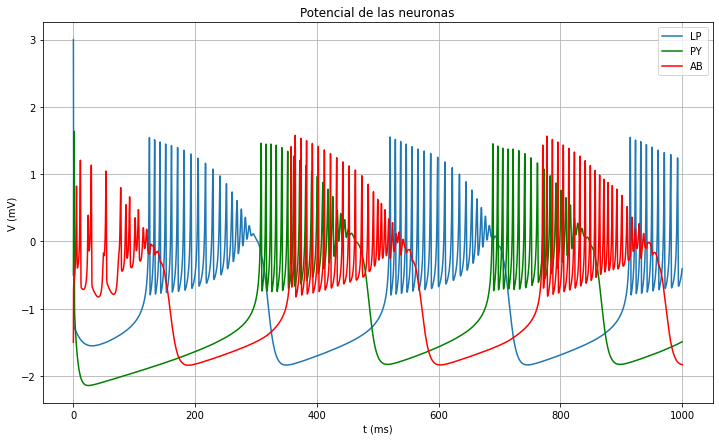

In [20]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,1000,L), neuronas["LP"][x],label="LP")
ax.plot(np.linspace(0,1000,L), neuronas["PY"][x],c="g", label="PY")
ax.plot(np.linspace(0,1000,L), neuronas["AB"][x],c="r", label="AB")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de las neuronas')
plt.legend()
plt.grid()

Como se puede observar en el gráfico, en las tres neuronas que están enlazadas quimicamente con enlaces sinápticos fast y slow (AB, LP y PY), se produce su sincronización de antifases, es decir la alternancia de alcanzar el valor máximo de cada neurona con el que se acaba generando un patrón que se repite periodicamente cuando se transcurre 500 ms.

Se puede observar como esto da lugar al característico patrón de activación secuencial de las neuronas del circuito. Es un patrón robusto, ya que a pesar de que la duración de los distintos disparos puedan variar, el orden de los mismos es siempre el mismo, en particular rojo-azul-verde en este gráfica. El uso de CPGs es útil para el estudio de los comportamientos complejos producidos al realizar actividades rítmicas como podría ser caminar.

Potencial de las neuronas con con conexiones electricas

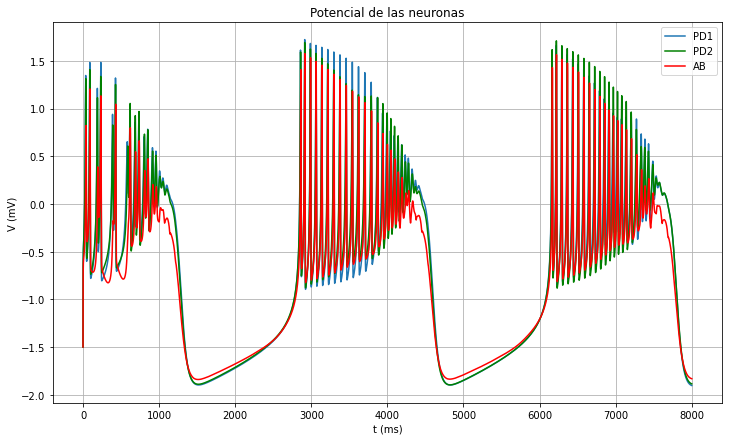

In [21]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,8000,L), neuronas["PD1"][x],label="PD1")
ax.plot(np.linspace(0,8000,L), neuronas["PD2"][x],c="g", label="PD2")
ax.plot(np.linspace(0,8000,L), neuronas["AB"][x],c="r", label="AB")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de las neuronas')
plt.legend()
plt.grid()

En esta última sección, se observa la sincronización completa que se produce con las neuronas enlazadas electricamente (PD1, PD2 y AB)

#### CPG reducido dañado

Para simular la red CPG anterior, pero dañada, se realizará la eliminación de las sinapsis de gradación lenta.

In [22]:
L = 1000000
neuronas_d={
    "PD1":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "PD2":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "AB":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "LP":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),np.full(L,0.74),np.full(L,0.007))),
    "PY":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),np.full(L,0.74),np.full(L,0.15))),

    "PD2-PD1":0.332, #Dirección inversa con el mismo valor
    "AB-PD1":0.325,  #Dirección inversa con el mismo valor
    "AB-PD2":0.548,  #Dirección inversa con el mismo valor

    "gfAB-LP": 0.112,
    "gfAB-PY":0.120,
    "gfLP-AB":0.585,
    "gfLP-PY":0.241,
    "gfPY-LP":0.186,

    "glAB-LP":0.032,
    "glAB-PY":0.029
}
x=0
y=1
z=2
m=3
k1=4
k2=5

mu = 0.0021
s = 4

a=3
b=1
c=1
d=5

In [23]:
def iteracion_d(neurona, name, t, x_vec_e=np.zeros(1), x_vec_f=np.zeros(1), g_elec=np.zeros(1), g_fast=np.zeros(1), g_slow=0.0, fast=0, slow=0, e=3.0):
    Isyn = 0
    if fast:
        Isyn += Ifast(g_fast, neurona[x][t-1], x_vec_f)
    if slow:
        Isyn += Islow(g_slow, neurona[x][t-1], neurona[m][t-1])

    # Actualizaciones de estado
    neurona[x][t] = neurona[x][t-1] + 0.001 * (neurona[y][t-1] + a * neurona[x][t-1]**2 - b * neurona[x][t-1]**3 - neurona[z][t-1] + e - difPoten(g_elec, neurona[x][t-1], x_vec_e) - Isyn)
    neurona[y][t] = neurona[y][t-1] + 0.001 * (c - d * neurona[x][t-1]**2 - neurona[y][t-1])
    neurona[z][t] = neurona[z][t-1] + 0.001 * (mu * (s * (neurona[x][t-1] + 1.6) - neurona[z][t-1]))

def caso_base(neurona,x_0,y_0,z_0,m_0=0):
  neurona[x][0]=x_0
  neurona[y][0] = y_0
  neurona[z][0] = z_0

  if neurona.shape[0] > 3:
    neurona[m][0]=m_0

def global_HR_d(neuronas):
  print("Calculando...")
  caso_base(neuronas["PD1"],-1.5,0.3,3)
  caso_base(neuronas["PD2"],-1.5,0.3,3)
  caso_base(neuronas["AB"],-1.5,0.1,3)
  caso_base(neuronas["PY"],-0.5,6,5)
  caso_base(neuronas["LP"],3,-3,3)
  for i in range(1,L):
    
    iteracion_d(neuronas["PD1"], 'PD1',i,x_vec_e=np.array((neuronas["PD2"][x][i-1],neuronas["AB"][x][i-1])),g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD1"])))
    iteracion_d(neuronas["PD2"], 'PD2',i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["AB"][x][i-1])),g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD2"])))

    iteracion_d(neuronas["AB"],'AB',i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["PD2"][x][i-1])),x_vec_f=[neuronas["LP"][x][i-1]],\
              g_elec=np.array((neuronas["AB-PD1"],neuronas["AB-PD2"])),g_fast=[neuronas["gfLP-AB"]],fast=1)

    iteracion_d(neuronas["LP"],'LP',i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["PY"][x][i-1])),\
              g_fast=np.array((neuronas["gfAB-LP"],neuronas["gfPY-LP"])),fast=1)

    iteracion_d(neuronas["PY"],'PY',i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["LP"][x][i-1])),\
              g_fast=np.array((neuronas["gfAB-PY"],neuronas["gfLP-PY"])),fast=1)

global_HR_d(neuronas_d)

Calculando...


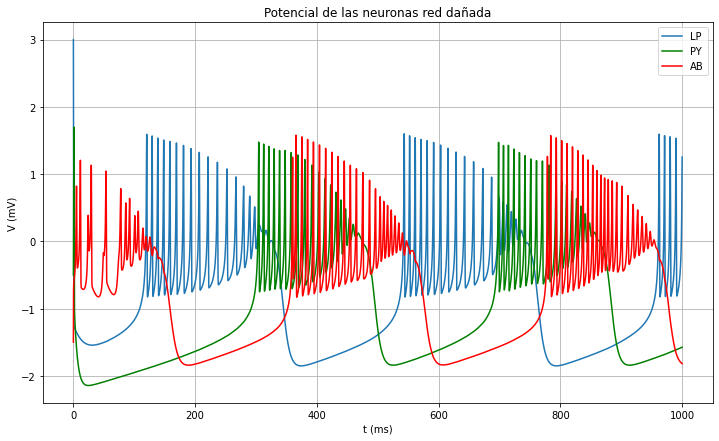

In [24]:
ig, ax = plt.subplots(figsize=(12, 7))
ax.plot(np.linspace(0,1000,L), neuronas_d["LP"][x],label="LP")
ax.plot(np.linspace(0,1000,L), neuronas_d["PY"][x],c="g", label="PY")
ax.plot(np.linspace(0,1000,L), neuronas_d["AB"][x],c="r", label="AB")
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de las neuronas red dañada')
plt.legend()
plt.grid()

Como puede observarse en las gráficas del esquema con el daño simulado, las neuronas AB-LP-PY siguen en trifase, al igual que en el circuito inicial, pero las terminaciones de los "triángulos" son algo diferentes. Esto es por la ausencia de las sinapsis de gradación lenta entre las neuronas AB-LP y AB-PY, pero sin ser lo suficientemente significativas para modificar el comportamiento del CPG.

#### CPG circuito completo

En esta sección vamos a simular la red CPG más realista.

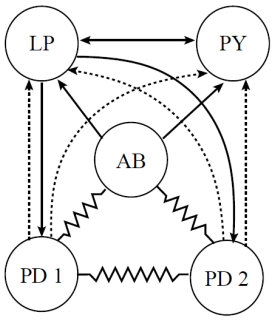

Como puede observarse en el esquema, hay varias sinapsis que se modifican y otras que son nuevas.

Las que se modifican son:
* De la neurona AB ya no salen sinapsis de gradación lenta.
* La neurona AB ya no tiene sinapsis de gradación rápida proveniente de LP.
* Las neuronas PD1 y PD2 tienen sinapsis de gradación rápida provenientes de LP.
* La neurona LP tiene ahora $2$ sinapsis de gradación lenta proveniente2 de PD1 y PD2.
* La neurona PY tiene ahora $2$ sinapsis de gradación lenta provenientes de PD1 y PD2.

Vamos a realizar algunos cambios sobre el código de la simulación del circuito CPG reducido. Empezamos cambiando el diccionario para el sistema:

In [25]:
L = 1000000
neuronas_c={
    # Mantenemos los arrays de las neuronas
    "PD1":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "PD2":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "AB":np.array((np.zeros(L),np.zeros(L),np.zeros(L))),
    "LP":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),np.full(L,0.74),np.full(L,0.007))),
    "PY":np.array((np.zeros(L),np.zeros(L),np.zeros(L),np.zeros(L),np.full(L,0.74),np.full(L,0.15))),

    # Valores escalares k1 y k2 para LP y PY
    "LP_k1": 0.74,
    "LP_k2": 0.007,
    "PY_k1": 0.74,
    "PY_k2": 0.15,

    "PD2-PD1":0.332, #Dirección inversa con el mismo valor
    "AB-PD1":0.325,  #Dirección inversa con el mismo valor
    "AB-PD2":0.548,  #Dirección inversa con el mismo valor

    "gfAB-LP": 0.112,
    "gfAB-PY":0.120,
    "gfLP-PD1":0.208,
    "gfLP-PD2":0.432,
    "gfLP-PY":0.241,
    "gfPY-LP":0.186,

    "glPD1-LP":0.046,
    "glPD1-PY":0.065,
    "glPD2-LP":0.038,
    "glPD2-PY":0.035
}
x=0
y=1
z=2
m=3
k1=4
k2=5

mu = 0.0021
s = 4

a=3
b=1
c=1
d=5

In [ ]:
def iteracion(neurona, name, t, x_vec_e=np.zeros(1), x_vec_f=np.zeros(1), g_elec=np.zeros(1), g_fast=np.zeros(1), g_slow=0.0, fast=0, slow=0, e=3.0):
    Isyn = 0
    if fast:
        Isyn += Ifast(g_fast, neurona[x][t-1], x_vec_f)
    if slow:
        Isyn += Islow(g_slow, neurona[x][t-1], neurona[m][t-1])

    # Actualizaciones de estado
    neurona[x][t] = neurona[x][t-1] + 0.001 * (neurona[y][t-1] + a * neurona[x][t-1]**2 - b * neurona[x][t-1]**3 - neurona[z][t-1] + e - difPoten(g_elec, neurona[x][t-1], x_vec_e) - Isyn)
    neurona[y][t] = neurona[y][t-1] + 0.001 * (c - d * neurona[x][t-1]**2 - neurona[y][t-1])
    neurona[z][t] = neurona[z][t-1] + 0.001 * (mu * (s * (neurona[x][t-1] + 1.6) - neurona[z][t-1]))

    if name in ['LP', 'PY']:  # Comprobamos si existe la variable m
        # Asegurarnos de que utilizamos el valor correcto para k1 y k2, que son escalares y no índices de array
        if 'LP' in name:
          k1_value = neuronas['LP_k1']
          k2_value = neuronas['LP_k2']
        else:
          k1_value = neuronas['PY_k1']
          k2_value = neuronas['PY_k2']

        neurona[m][t] = neurona[m][t-1] + 0.001 * ((k1_value * (1 - neurona[m][t-1])) / (1 + np.exp(s_slow * (v_slow - neuronas["AB"][x][t-1]))) - k2_value * neurona[m][t-1])

def caso_base(neurona,x_0,y_0,z_0,m_0=0):
  neurona[x][0]=x_0
  neurona[y][0] = y_0
  neurona[z][0] = z_0

  if neurona.shape[0] > 3:
    neurona[m][0]=m_0

def global_HR_c(neuronas):
  print("Calculando...")
  caso_base(neuronas["PD1"],-1.5,0.3,3)
  caso_base(neuronas["PD2"],-1.5,0.3,3)
  caso_base(neuronas["AB"],-1.5,0.1,3,1)
  caso_base(neuronas["PY"],-0.5,6,5,1)
  caso_base(neuronas["LP"],3,-3,3,1)
  for i in range(1,L):
    
    iteracion(neuronas["PD1"], 'PD1',i,x_vec_e=np.array((neuronas["PD2"][x][i-1],neuronas["AB"][x][i-1])),
                                       x_vec_f=np.array((neuronas["LP"][x][i-1])),
                                       g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD1"])),
                                       g_fast=[neuronas["gfLP-PD1"]],
                                       fast=1)
    
    iteracion(neuronas["PD2"], 'PD2',i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["AB"][x][i-1])),
                                       x_vec_f=np.array((neuronas["LP"][x][i-1]))
                                       g_elec=np.array((neuronas["PD2-PD1"],neuronas["AB-PD2"])))

    iteracion(neuronas["AB"],'AB',i,x_vec_e=np.array((neuronas["PD1"][x][i-1],neuronas["PD2"][x][i-1])),x_vec_f=[neuronas["LP"][x][i-1]],\
                                    g_elec=np.array((neuronas["AB-PD1"],neuronas["AB-PD2"])),
                                    g_fast=[neuronas["gfLP-AB"]],fast=1)

    iteracion(neuronas["LP"],'LP',i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["PY"][x][i-1])),\
                                    g_fast=np.array((neuronas["gfAB-LP"],neuronas["gfPY-LP"])),
                                    g_slow=neuronas["glAB-LP"],
                                    fast=1,slow=1)

    iteracion(neuronas["PY"],'PY',i,x_vec_f=np.array((neuronas["AB"][x][i-1],neuronas["LP"][x][i-1])),\
                                    g_fast=np.array((neuronas["gfAB-PY"],neuronas["gfLP-PY"])),
                                    g_slow=neuronas["glAB-PY"],
                                    fast=1,slow=1)

global_HR(neuronas_c)